Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução a Teoria das Vibrações


### Trabalho 1

### 00312240 -  Fernanda Petry Pes


[1.   Introdução](#section_1)  
[2.   Coleta de informações](#section_2)  
[3.   Cálculo dos deslocamentos - Método de Duhamel](#section_3)    
[4.   Plotagem do espectro de pseudoaceleração](#section_4)  
[5.   Periodograma](#section_5)  
[6.   Conclusões](#section_6)  


In [1]:
# Importação das bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1. Introdução <a name="section_1"></a> 

Este trabalho visa a aplicação do programa Python na confecção de gráficos que representam a resposta de um sistema com um grau de liberdade a uma excitação na base: espectro de pseudo acelerações. O acelerômetro do aplicativo "bosch iNVH", para celular, ira fornecer os dados para medição da excitação de uma máquina de lavar roupas. Neste  trabalho será feito o cálculo dos deslocamentos pelo método de Duhamel, a plotagem do espectro de pseudoaceleração e a realização de um periodograma. 

Abaixo são indicadas as características do sistema:

In [2]:
m  = 1.5       # massa kg
fn = np.linspace(0.1,10,1000)  # frequencia natural Hz
Tn = 1/fn
zt = 0.01      # amortecimento
u0 = 0.        # deslocamento inicial
v0 = 0.        # velocidade inicial


## 2. Coleta de informações <a name="section_3"></a> 

Através da medição da aceleração de uma máquina de lavar roupas, pelo aplicativo "iVNH", obteve-se um arquivo de excel no formato ".csv" que sera inserido pela classe MRPy, desenvolvida pelo Prof. Marcelo Maia Rocha.

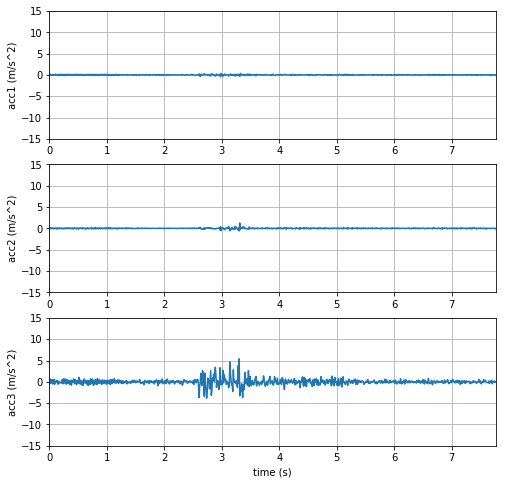

In [3]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(1, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-15, 15);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');


A seguir, a vibração na direção z (vertical) pode ser observada:


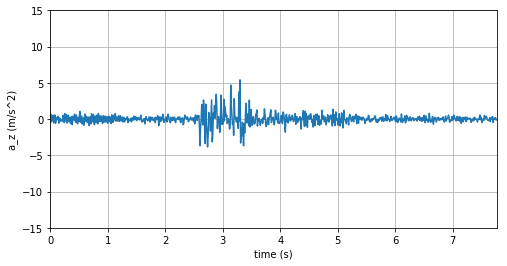

In [4]:
az = MRPy(data[2], data.fs)    #aceleração
t  = az.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 


## 3. Cálculo dos deslocamentos - Método de Duhamel <a name="section_3"></a> 


A integral de Duhamel é uma solução numérica restrita a sistemas lineares que respondem a uma excitação externa, conforme a integral abaixo, que caracteriza-se pela forma geral de um sistema amortecido e vibração forçada:

$$ u(t) = u_0(t) + \frac{1}{m \omega_{\rm D}} 
                   \int_0^t \exp \left[ -\zeta\omega_{\rm n}(t - \tau) \right] \;
                   \sin \omega_{\rm D} (t - \tau) \; F(\tau) \; d\tau $$


Quando associada a biblioteca MRPy a esse método, observa-se o seguinte:

In [5]:
umaximo = np.zeros(fn.shape) 

for k, f in enumerate(fn):
    
    u_Dx = az.sdof_Duhamel(f, zt, u0, v0)/m
    umaximo[k] = u_Dx.max()
wn = (2*np.pi*fn)   # frequência

## 4. Plotagem do espectro de pseudoaceleração <a name="section_6"></a> 

Através da aceleração de pico máxima pelo período obtem-se o espectro de pseudoaceleração. A aceleração de pico é encontrada através fórmula a seguir:

$$ a_p = w_n² * u_m  $$

Somente para casos com impactos de curta duração que indicam apenas a ocorrência de valores máximos é válida a aceleração de pico.


aceleração de pico máxima: 9.262711037377011


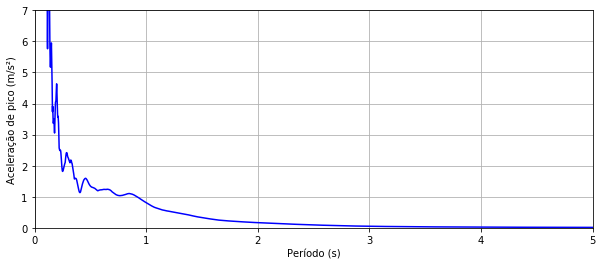

In [6]:
ap = wn*wn*umaximo   # aceleração pico

plt.figure(3, figsize=(10,4),clear = True)
plt.plot(Tn,ap, 'b')
plt.xlim(0,5)
plt.xlabel('Período (s)')
plt.ylim(0,7)
plt.ylabel('Aceleração de pico (m/s²)')
plt.grid(True)
print('aceleração de pico máxima:',max(ap))


## 5. Periodograma <a name="section_3"></a> 

Através do periodograma é possível observar um valor aproximado da frequência natural de vibração do caso em análise. Inicialmente, foi realizado o periodograma para os dados de entrada (Imput), a partir da classe MRPy e dos dados obtidos pelo aplicativo para acelerações verticais.


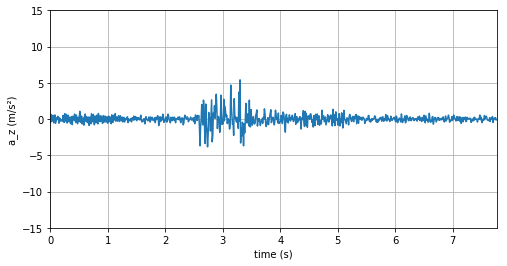

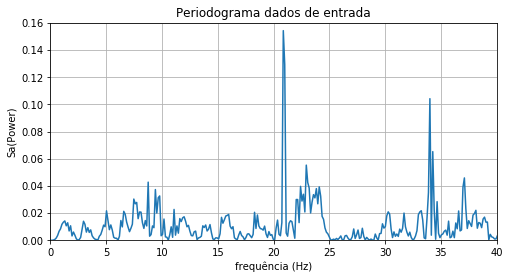

In [7]:

plt.figure(4, figsize=(8,4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)')
plt.ylim(-15,15);  plt.ylabel('a_z (m/s²)')

plt.grid(True)


Saz, fs = az.periodogram()   #periodograma
f       = az.f_axis()

plt.figure(5, figsize=(8,4), clear=True); plt.title('Periodograma dados de entrada')
plt.plot(f, Saz[0])

plt.xlim(0, 40);   plt.xlabel('frequência (Hz)')
plt.ylim(0, 0.16);   plt.ylabel('Sa(Power)')

plt.grid(True)


Em seguida, foi realizado o periodograma para os dados de saída (Output), a partir da classe MRPy e dos dados obtidos pelo aplicativo para acelerações verticais.


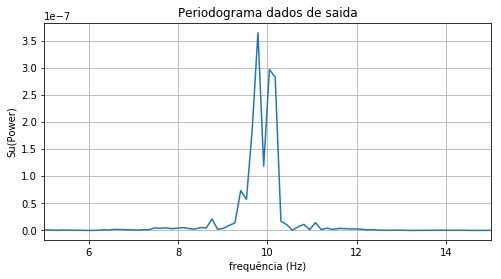

In [8]:

Su_Dx, fs = u_Dx.periodogram()

f = u_Dx.f_axis()

plt.figure(6, figsize=(8,4), clear=True); plt.title("Periodograma dados de saida")
plt.plot(f, Su_Dx[0])

plt.xlim(5, 15);  plt.xlabel('frequência (Hz)')
plt.ylabel('Su(Power)')

plt.grid(True)


## 6. Conclusões <a name="section_3"></a> 

Através da vibração medida pelo aplicativo na direção vertical, foi possível analisar o sistema resultante da excitação da maquina de lavar roupas com apenas um grau de liberdade. 
Foi aplicado o método de Duhamel, pela classe MRPy, onde realizou-se o cálculo dos deslocamentos na direção vertical para 1000 valores de frequência natural, contidos entre 0.1 Hz e 10 Hz. Quando multiplicados os deslocamentos máximos pelo quadrado da frequência "wn",  obteve-se os valores da aceleração de pico. O valor máximo da aceleração de pico foi de, 9,26 m/s². Através do periodograma gerado, observou-se que uma das frequências naturais de vibração deste sistema é próxima de 21 Hz.